In [1]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
def get_data(train_data_path: str, test_data_path: str):
    train = pd.read_csv(train_data_path, parse_dates=[0], index_col=0)
    test = pd.read_csv(test_data_path, parse_dates=[0], index_col=0)    
    return train, test

In [3]:
def preprocess_data(train: pd.DataFrame, test: pd.DataFrame):
    train.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
    test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [4]:
def different_plots(train, test):
    train.plot(color='blue', label='Train Data')
    test.plot(color='red', label='Test Data')

def plot_autocorrelation(lag):
    # check for the autocorrelation plot
    # try changing lag for different variations.
    # it should have strong correlation either in positive or negative direction
    lag_plot(train, lag=lag)

In [5]:
def run_arima(train: pd.DataFrame, test: pd.DataFrame, order: tuple):
    
    historical_data = [x for x in train['Adj Close']]
    predictions_lst = list()
    for t in range(len(test)):
        current_data = test['Adj Close'][t]
        #forecast value
        model = ARIMA(historical_data, order)
        model_fit = model.fit(disp=0)
        prediction = model_fit.forecast()[0]
        #print('Actual=%f, Predicted=%f, error=%f' %(current_data, prediction, abs(current_data - prediction)))
        predictions_lst.append(prediction)
        historical_data.append(current_data)
    arima_mse = mean_squared_error(test['Adj Close'], predictions_lst)
    
    #plt.plot(test['Adj Close'].values, color='green', label='Actual')
    #plt.plot(predictions_lst, color='blue', label='Predicted')
    #plt.title('ARIMA MSE: %f' % arima_mse)
    return test['Adj Close'], predictions_lst, arima_mse

In [6]:
def run_arma(train: pd.DataFrame, test: pd.DataFrame, order: tuple):
    historical_data = [x for x in train['Adj Close']]
    predictions_lst = list()
    for t in range(len(test)):
        current_data = test['Adj Close'][t]
        #forecast value
        model = ARMA(historical_data, order)
        model_fit = model.fit(disp=0)
        prediction = model_fit.forecast()[0]
#         print('Actual=%f, Predicted=%f, error=%f' %(current_data, prediction, abs(current_data - prediction)))
        predictions_lst.append(prediction)
        historical_data.append(current_data)
    
    arma_mse = mean_squared_error(test['Adj Close'], predictions_lst)
    #plt.plot(test['Adj Close'].values, color='green', label='Actual')
    #plt.plot(predictions_lst, color='blue', label='Predicted')
    #plt.title('ARMA MSE : %f' % arma_mse)
    #print(predictions_lst, arma_mse)
    return test['Adj Close'], predictions_lst, arma_mse


In [7]:
# lag = 10
# plot_autocorrelation(lag)

In [8]:
# run_arima(train, test, order=(lag, 1, 0))

In [9]:
# run_arma(train, test, order=(lag,0))

In [10]:
def run_arima_for_stock_prediction(train_data_path, test_data_path, order):
    train, test = get_data(train_data_path, test_data_path)
    preprocess_data(train, test)
    #different_plots(train, test)
    return run_arima(train, test, order)

def run_arma_for_stock_prediction(train_data_path, test_data_path, order):
    train, test = get_data(train_data_path, test_data_path)
    preprocess_data(train, test)
    return run_arma(train, test, order)
    

In [11]:
amazon_train, amazon_test = ('data/train/AMZN_train.csv', 'data/test/AMZN_test.csv')
apple_train, apple_test = ('data/train/Apple_train.csv', 'data/test/Apple_test.csv')
baba_train, baba_test = ('data/train/BABA_train.csv', 'data/test/BABA_test.csv')
bac_train, bac_test = ('data/train/BAC_train.csv', 'data/test/BAC_test.csv')
coke_train, coke_test = ('data/train/Coke_train.csv', 'data/test/Coke_test.csv')
disney_train, disney_test = ('data/train/Disney_train.csv', 'data/test/Disney_test.csv')
goldman_sachs_train, goldman_sachs_test = ('data/train/GoldmanSachs_train.csv', 'data/test/GoldmanSachs_test.csv')
roku_train, roku_test = ('data/train/ROKU_train.csv', 'data/test/ROKU_test.csv')
tsla_train, tsla_test = ('data/train/TSLA_train.csv', 'data/test/TSLA_test.csv')
wells_fargo_train, wells_fargo_test = ('data/train/WellsFargo_train.csv', 'data/test/WellsFargo_test.csv')


In [12]:
order = (2, 1, 1)
amazon_test, amazon_predict, amazon_mse = run_arima_for_stock_prediction(amazon_train, amazon_test, order)
apple_test, apple_predict, apple_mse = run_arima_for_stock_prediction(apple_train, apple_test, order)
baba_test, baba_predict, baba_mse = run_arima_for_stock_prediction(baba_train, baba_test, order)
bac_test, bac_predict, bac_mse = run_arima_for_stock_prediction(bac_train, bac_test, order)
coke_test, coke_predict, coke_mse = run_arima_for_stock_prediction(coke_train, coke_test, order)
disney_test, disney_predict, disnety_mse = run_arima_for_stock_prediction(disney_train, disney_test, order)
goldman_sachs_test, goldman_sachs_predict, goldman_sachs_mse = run_arima_for_stock_prediction(goldman_sachs_train, goldman_sachs_test, order)
roku_test, roku_predict, roku_mse = run_arima_for_stock_prediction(roku_train, roku_test, order)
tsla_test, tsla_predict, tsla_mse = run_arima_for_stock_prediction(tsla_train, tsla_test, order)
wells_fargo_test, wells_fargo_predict, wells_fargo_mse = run_arima_for_stock_prediction(wells_fargo_train, wells_fargo_test, order)

/Users/prasangbiyani/Desktop/code/ml/my_env/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/prasangbiyani/Desktop/code/ml/my_env/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/prasangbiyani/Desktop/code/ml/my_env/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/prasangbiyani/Desktop/code/ml/my_env/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/prasangbiyani/Desktop/code/ml/my_env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting 

Text(0.5, 1.0, 'Wells Fargo Mean Squared Error 0.492086')

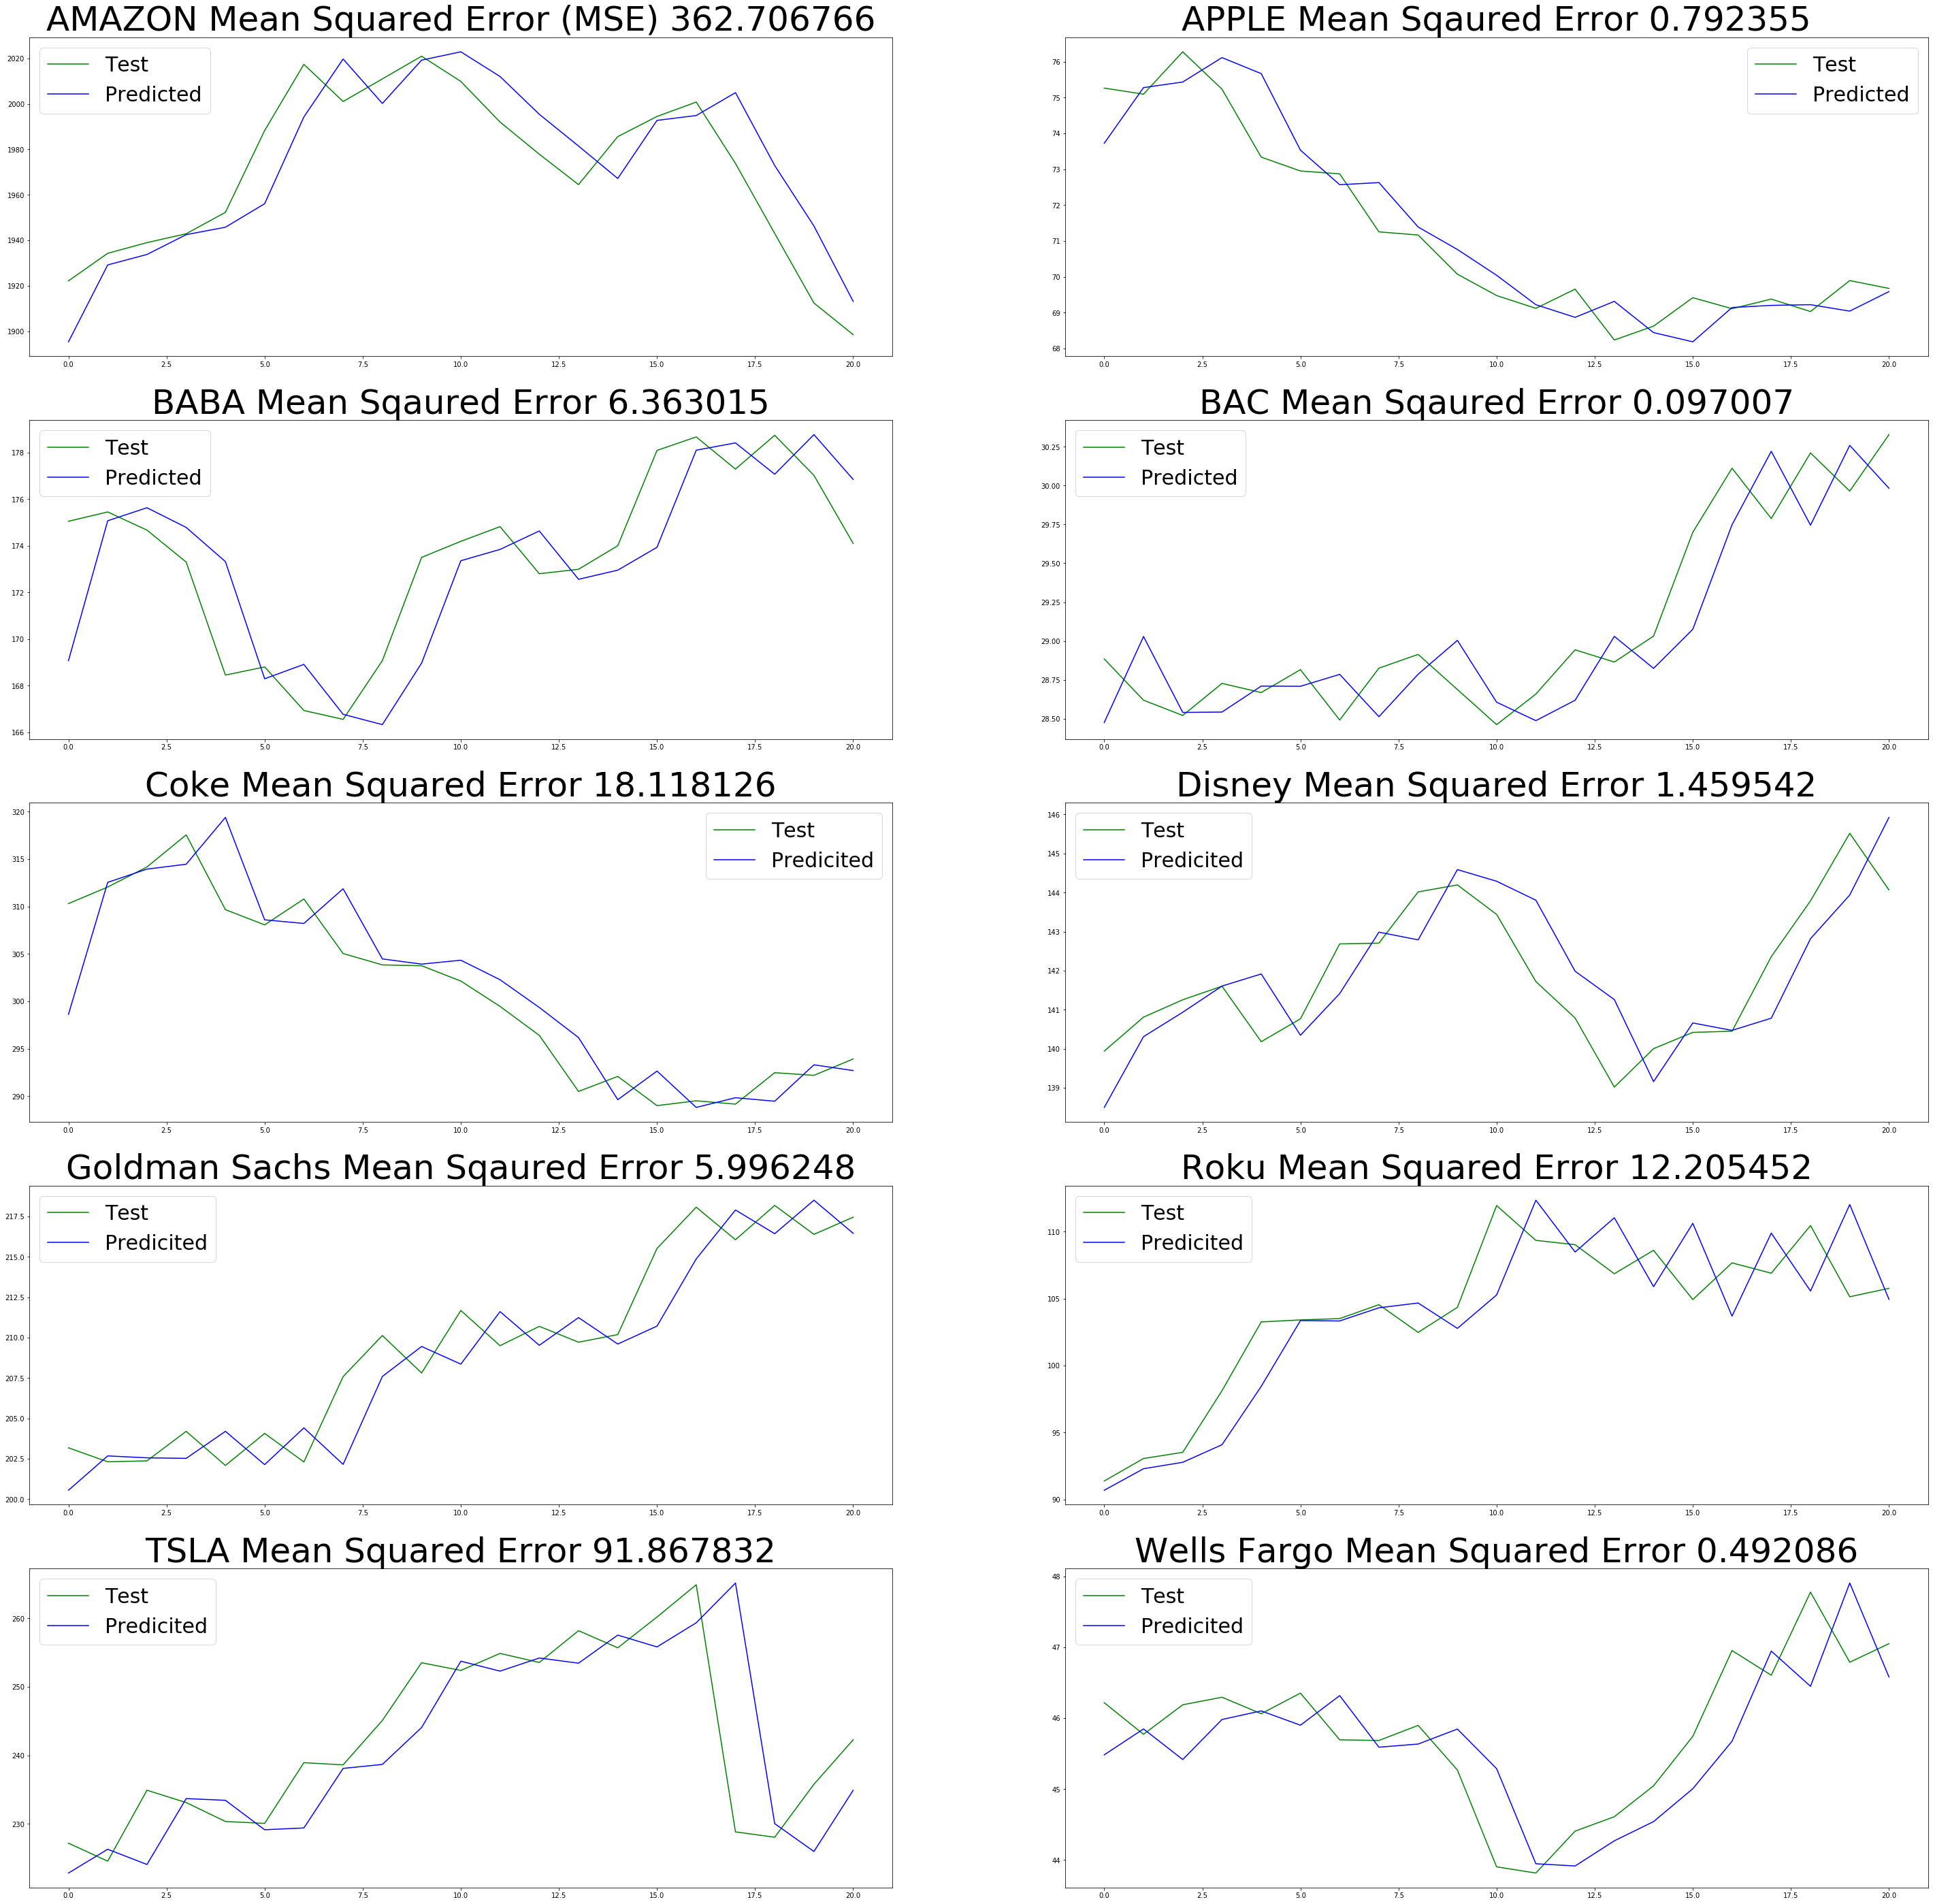

In [13]:
plt.figure(figsize=(50, 50))
plt.subplot(5,2,1)
plt.plot(amazon_test.values, color='green', label='Test')
plt.plot(amazon_predict, color='blue', label='Predicted')
plt.legend(fontsize=30)
plt.title('AMAZON Mean Squared Error (MSE) %f' %amazon_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,2)
plt.plot(apple_test.values, color='green', label='Test')
plt.plot(apple_predict, color='blue', label='Predicted')
plt.legend(fontsize=30)
plt.title('APPLE Mean Sqaured Error %f' %apple_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,3)
plt.plot(baba_test.values, color='green', label='Test')
plt.plot(baba_predict, color='blue', label='Predicted')
plt.legend(fontsize=30)
plt.title('BABA Mean Sqaured Error %f' %baba_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,4)
plt.plot(bac_test.values, color='green', label='Test')
plt.plot(bac_predict, color='blue', label='Predicted')
plt.legend(fontsize=30)
plt.title('BAC Mean Sqaured Error %f' %bac_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,5)
plt.plot(coke_test.values, color='green', label='Test')
plt.plot(coke_predict, color='blue', label='Predicited')
plt.legend(fontsize=30)
plt.title('Coke Mean Squared Error %f' %coke_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,6)
plt.plot(disney_test.values, color='green', label='Test')
plt.plot(disney_predict, color='blue', label='Predicited')
plt.legend(fontsize=30)
plt.title('Disney Mean Squared Error %f' %disnety_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,7)
plt.plot(goldman_sachs_test.values, color='green', label='Test')
plt.plot(goldman_sachs_predict, color='blue', label='Predicited')
plt.legend(fontsize=30)
plt.title('Goldman Sachs Mean Sqaured Error %f' %goldman_sachs_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,8)
plt.plot(roku_test.values, color='green', label='Test')
plt.plot(roku_predict, color='blue', label='Predicited')
plt.legend(fontsize=30)
plt.title('Roku Mean Squared Error %f' %roku_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,9)
plt.plot(tsla_test.values, color='green', label='Test')
plt.plot(tsla_predict, color='blue', label='Predicited')
plt.legend(fontsize=30)
plt.title('TSLA Mean Squared Error %f' %tsla_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,10)
plt.plot(wells_fargo_test.values, color='green', label='Test')
plt.plot(wells_fargo_predict, color='blue', label='Predicited')
plt.legend(fontsize=30)
plt.title('Wells Fargo Mean Squared Error %f' %wells_fargo_mse, fontdict={'fontsize': 50})




In [17]:
amazon_train, amazon_test = ('data/train/AMZN_train.csv', 'data/test/AMZN_test.csv')
apple_train, apple_test = ('data/train/Apple_train.csv', 'data/test/Apple_test.csv')
baba_train, baba_test = ('data/train/BABA_train.csv', 'data/test/BABA_test.csv')
bac_train, bac_test = ('data/train/BAC_train.csv', 'data/test/BAC_test.csv')
coke_train, coke_test = ('data/train/Coke_train.csv', 'data/test/Coke_test.csv')
disney_train, disney_test = ('data/train/Disney_train.csv', 'data/test/Disney_test.csv')
goldman_sachs_train, goldman_sachs_test = ('data/train/GoldmanSachs_train.csv', 'data/test/GoldmanSachs_test.csv')
roku_train, roku_test = ('data/train/ROKU_train.csv', 'data/test/ROKU_test.csv')
tsla_train, tsla_test = ('data/train/TSLA_train.csv', 'data/test/TSLA_test.csv')
wells_fargo_train, wells_fargo_test = ('data/train/WellsFargo_train.csv', 'data/test/WellsFargo_test.csv')


In [18]:
order=(3,1)
amazon_test, amazon_predict, amazon_mse = run_arma_for_stock_prediction(amazon_train, amazon_test, order)
apple_test, apple_predict, apple_mse = run_arma_for_stock_prediction(apple_train, apple_test, order)
baba_test, baba_predict, baba_mse = run_arma_for_stock_prediction(baba_train, baba_test, order)
bac_test, bac_predict, bac_mse = run_arma_for_stock_prediction(bac_train, bac_test, order)
coke_test, coke_predict, coke_mse = run_arma_for_stock_prediction(coke_train, coke_test, order)
disney_test, disney_predict, disnety_mse = run_arma_for_stock_prediction(disney_train, disney_test, order)
goldman_sachs_test, goldman_sachs_predict, goldman_sachs_mse = run_arma_for_stock_prediction(goldman_sachs_train, goldman_sachs_test, order)
roku_test, roku_predict, roku_mse = run_arma_for_stock_prediction(roku_train, roku_test, order)
tsla_test, tsla_predict, tsla_mse = run_arma_for_stock_prediction(tsla_train, tsla_test, order)
wells_fargo_test, wells_fargo_predict, wells_fargo_mse = run_arma_for_stock_prediction(wells_fargo_train, wells_fargo_test, order)

/Users/prasangbiyani/Desktop/code/ml/my_env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/prasangbiyani/Desktop/code/ml/my_env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/prasangbiyani/Desktop/code/ml/my_env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/prasangbiyani/Desktop/code/ml/my_env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/prasangbiyani/Desktop/code/ml/my_env/lib/python3.6/site-packages/statsmodels/base/

Text(0.5, 1.0, 'Wells Fargo Mean Squared Error 0.422915')

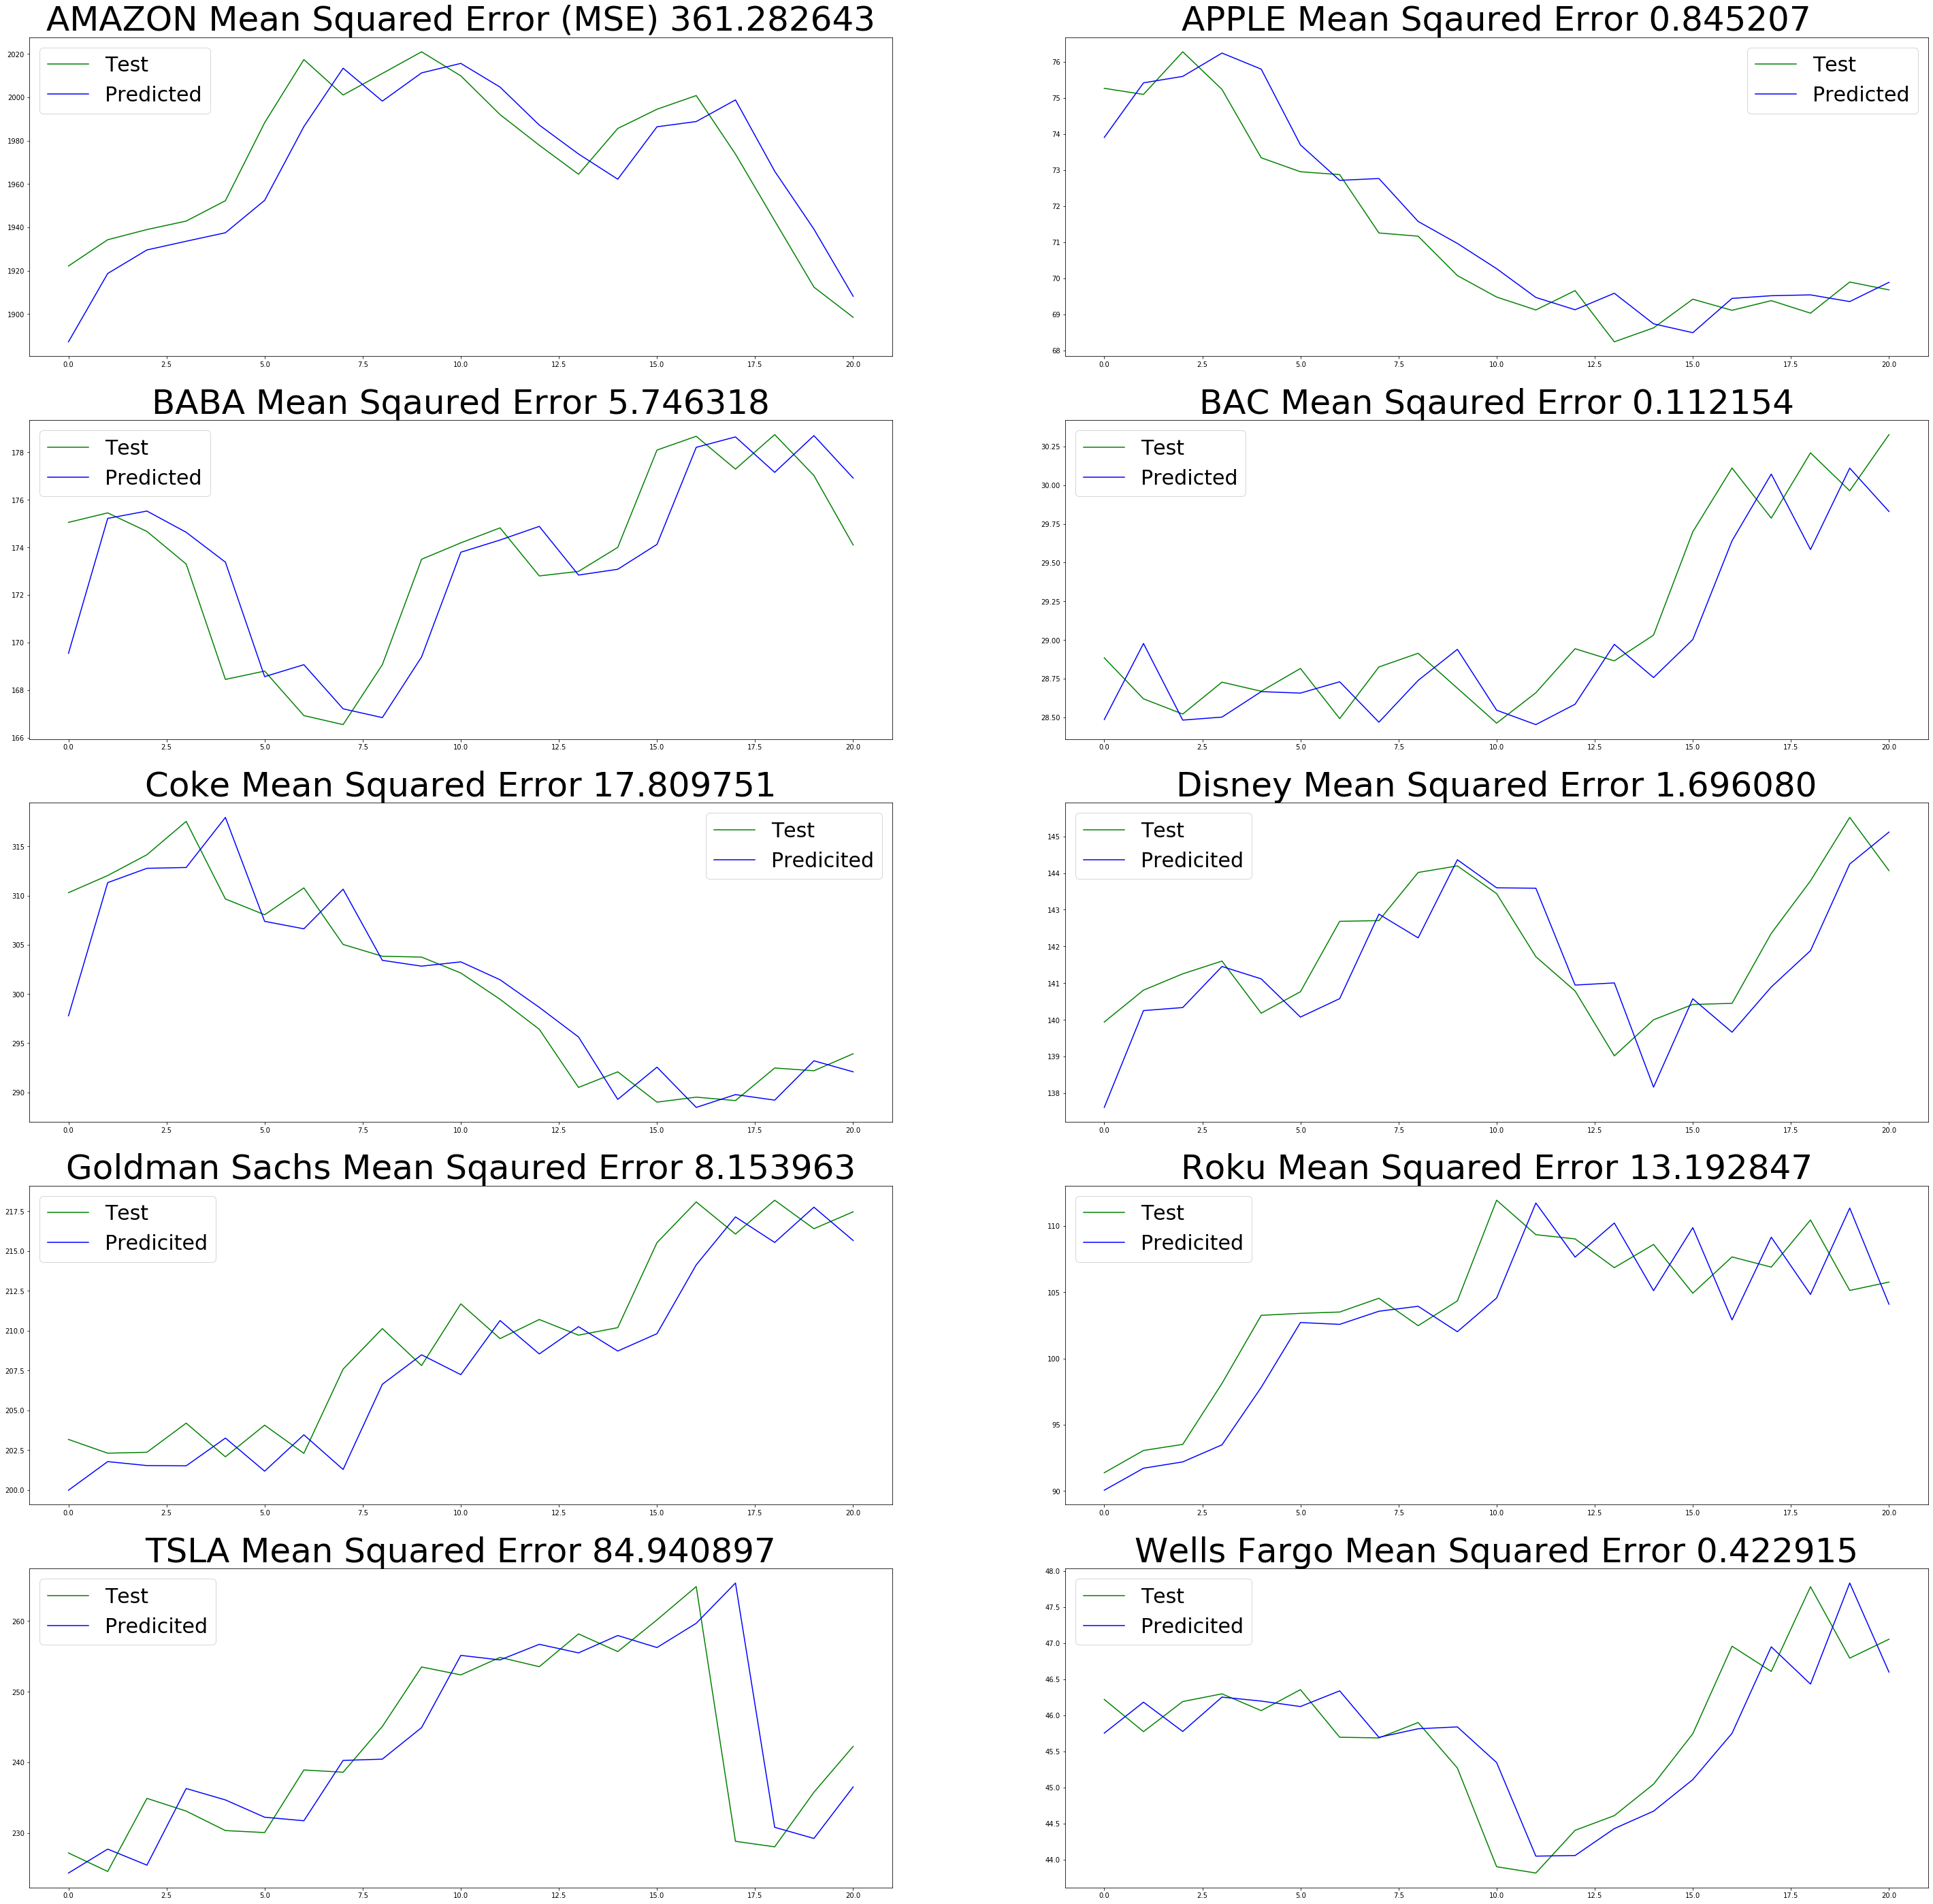

In [19]:
plt.figure(figsize=(50, 50))
plt.subplot(5,2,1)
plt.plot(amazon_test.values, color='green', label='Test')
plt.plot(amazon_predict, color='blue', label='Predicted')
plt.legend(fontsize=30)
plt.title('AMAZON Mean Squared Error (MSE) %f' %amazon_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,2)
plt.plot(apple_test.values, color='green', label='Test')
plt.plot(apple_predict, color='blue', label='Predicted')
plt.legend(fontsize=30)
plt.title('APPLE Mean Sqaured Error %f' %apple_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,3)
plt.plot(baba_test.values, color='green', label='Test')
plt.plot(baba_predict, color='blue', label='Predicted')
plt.legend(fontsize=30)
plt.title('BABA Mean Sqaured Error %f' %baba_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,4)
plt.plot(bac_test.values, color='green', label='Test')
plt.plot(bac_predict, color='blue', label='Predicted')
plt.legend(fontsize=30)
plt.title('BAC Mean Sqaured Error %f' %bac_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,5)
plt.plot(coke_test.values, color='green', label='Test')
plt.plot(coke_predict, color='blue', label='Predicited')
plt.legend(fontsize=30)
plt.title('Coke Mean Squared Error %f' %coke_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,6)
plt.plot(disney_test.values, color='green', label='Test')
plt.plot(disney_predict, color='blue', label='Predicited')
plt.legend(fontsize=30)
plt.title('Disney Mean Squared Error %f' %disnety_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,7)
plt.plot(goldman_sachs_test.values, color='green', label='Test')
plt.plot(goldman_sachs_predict, color='blue', label='Predicited')
plt.legend(fontsize=30)
plt.title('Goldman Sachs Mean Sqaured Error %f' %goldman_sachs_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,8)
plt.plot(roku_test.values, color='green', label='Test')
plt.plot(roku_predict, color='blue', label='Predicited')
plt.legend(fontsize=30)
plt.title('Roku Mean Squared Error %f' %roku_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,9)
plt.plot(tsla_test.values, color='green', label='Test')
plt.plot(tsla_predict, color='blue', label='Predicited')
plt.legend(fontsize=30)
plt.title('TSLA Mean Squared Error %f' %tsla_mse, fontdict={'fontsize': 50})

plt.subplot(5,2,10)
plt.plot(wells_fargo_test.values, color='green', label='Test')
plt.plot(wells_fargo_predict, color='blue', label='Predicited')
plt.legend(fontsize=30)
plt.title('Wells Fargo Mean Squared Error %f' %wells_fargo_mse, fontdict={'fontsize': 50})
